In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\aditi\Downloads\customer_booking.csv', encoding="ISO-8859-1")


In [3]:
df.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [4]:
df = df.copy()
df['flight_day'] = df['flight_day'].map({'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6, 'Sat': 7})

In [5]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,7,1,0,0,5.52,0
1,1,112,20,3,7,0,0,0,5.52,0
2,2,243,22,17,4,1,1,0,5.52,0
3,1,96,31,4,7,0,0,1,5.52,0
4,2,68,22,15,4,1,0,1,5.52,0


In [6]:
correlation = df.corr()

<Axes: >

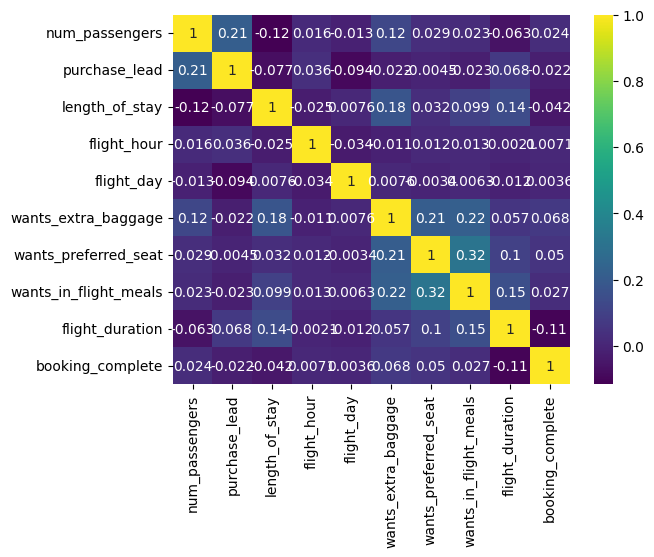

In [8]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap = 'viridis')

C:\Users\aditi_zg48xl\AppData\Local\Temp\ipykernel_9764\1423166431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['booking_complete'],color='purple',bins=10)


<Axes: xlabel='booking_complete', ylabel='Density'>

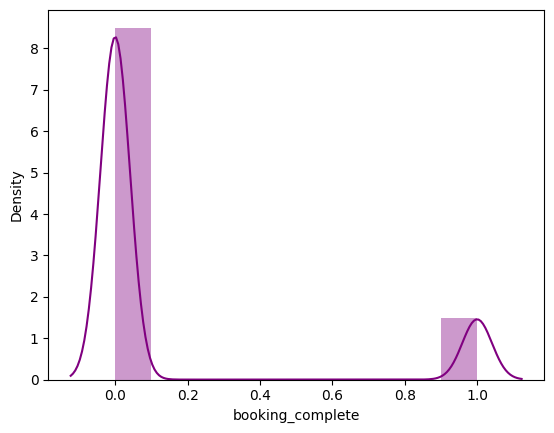

In [11]:
sns.distplot(df['booking_complete'],color='purple',bins=10)

NameError: name 'clf_rf' is not defined

<Figure size 1000x500 with 0 Axes>

In [13]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [14]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [16]:
selected_features = X.columns[selector.get_support(indices=True)]
df = [selected_features.append(pd.Index(['booking_complete']))]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\aditi_zg48xl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = lr_model.predict(X_test)

In [20]:
print("Confusion Matrix is as shown below")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is as shown below
[[8520    0]
 [1480    0]]


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



C:\Users\aditi_zg48xl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aditi_zg48xl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aditi_zg48xl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [24]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print('Accuracy of Logistic Regression:', accuracy)

Accuracy of Logistic Regression: 85.2


In [25]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.725904


C:\Users\aditi_zg48xl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import recall_score

# Calculate recall for a specific class (replace "class_name" with the actual class name)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.852


In [27]:
from sklearn.metrics import f1_score

# Calculate recall for a specific class (replace "class_name" with the actual class name)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.7839136069114472


In [34]:
import numpy as np

importance = np.abs(lr_model.coef_[0])

In [35]:
sorted_indices = np.argsort(importance)[::-1]
feature_names = X_train.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

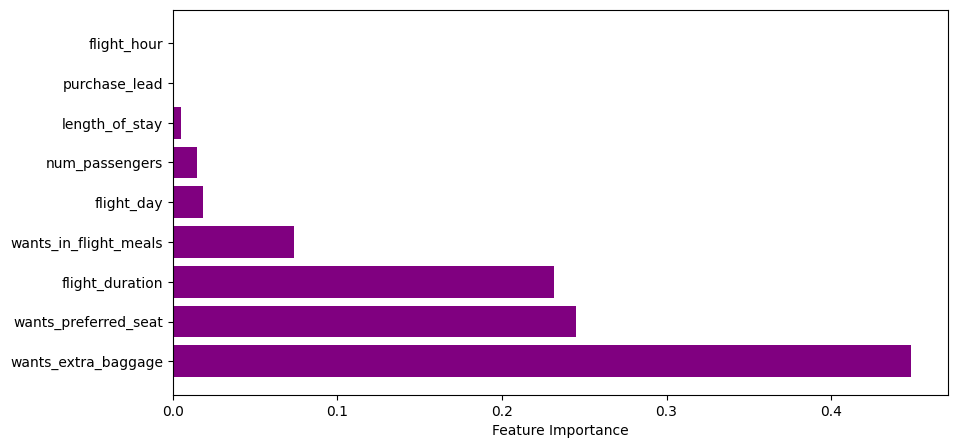

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_importance)), sorted_importance, color='purple')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.show()